## **Interpretability and Explainability in ML**

**This Notebook aims to highlight the Importance Interpretability and Explainability in Machine Learning**
* Data Acquisition
* Data reading
* Exploratory Data Analysis
* Modeling
* Interpretability and Explainability of the models
* Evaluation
* Summary

#  Data Acquisition

The Pima Indians Diabetes Database is a widely used dataset for applying Explainable AI techniques like SHAP and LIME. It contains medical data from female patients of Pima Indian heritage, aged 21 and older, and is commonly used for binary classification tasks to predict diabetes onset. You can access this dataset on Kaggle.

In [1]:
!pip install skimpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 57.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 40.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 

In [2]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.2 MB/s eta 0:00:00:00:0100:01


# Data reading

In [3]:
import pandas as pd
import skimpy as skim
import sweetviz as sv

df = pd.read_csv('/kaggle/input/diabetesds/diabetes.csv.xls')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Exploratory Data analysis 

In [4]:
skim.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

                                             |          | [  0%]   00:00 -> (? left)


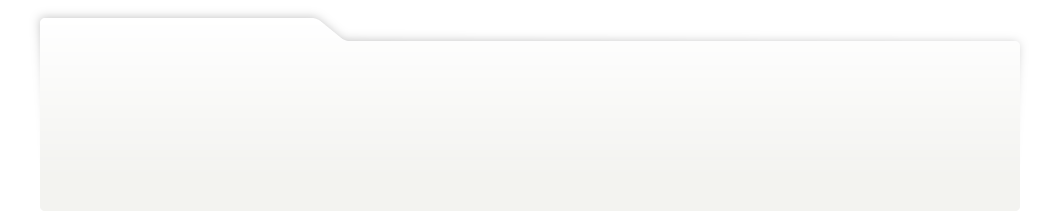
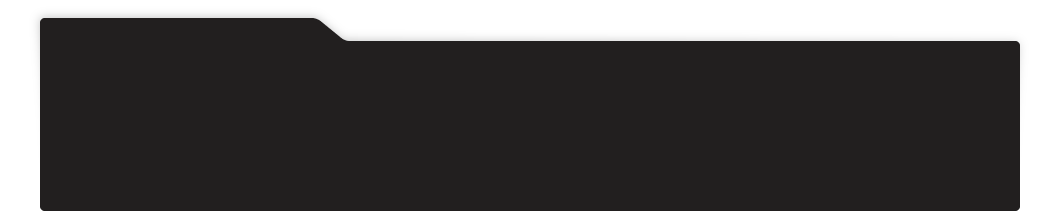
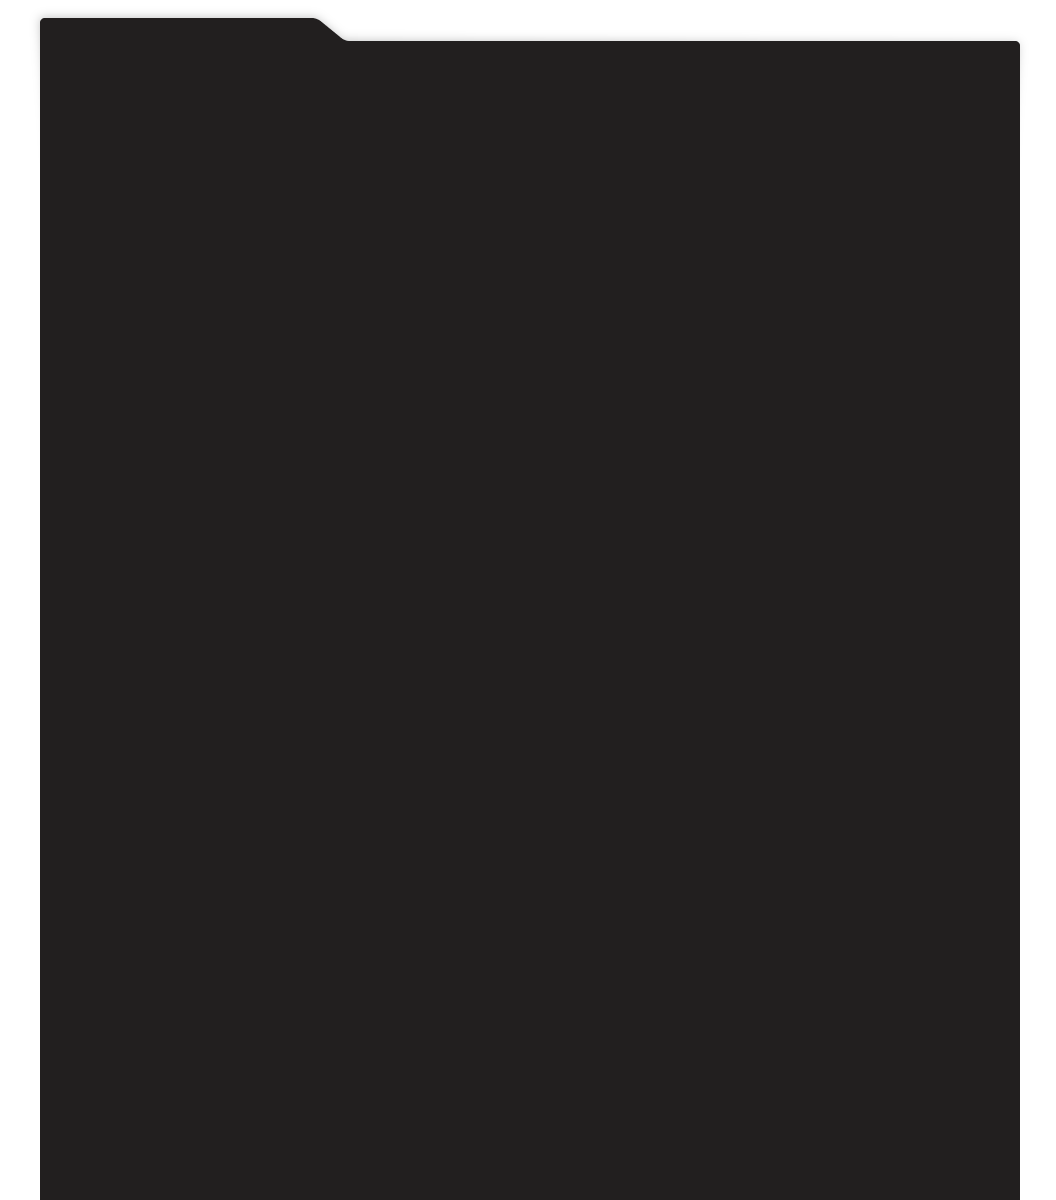
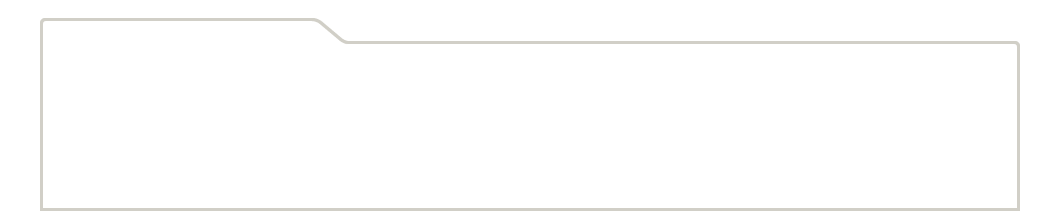
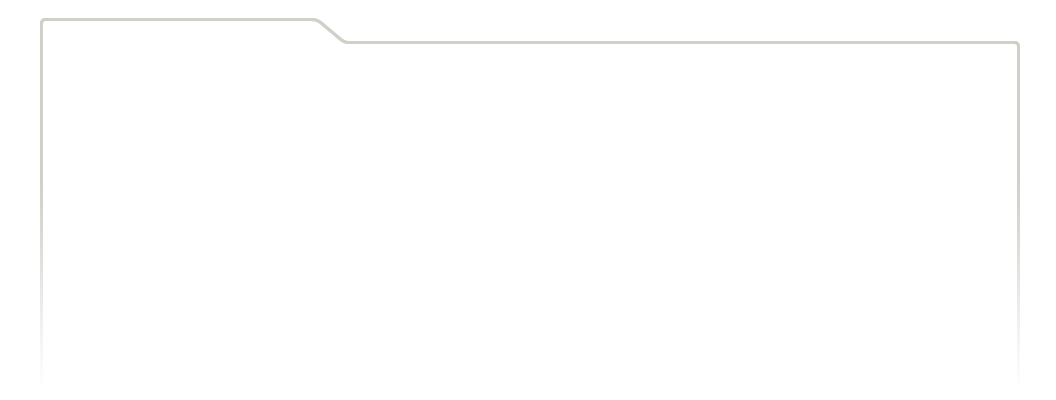
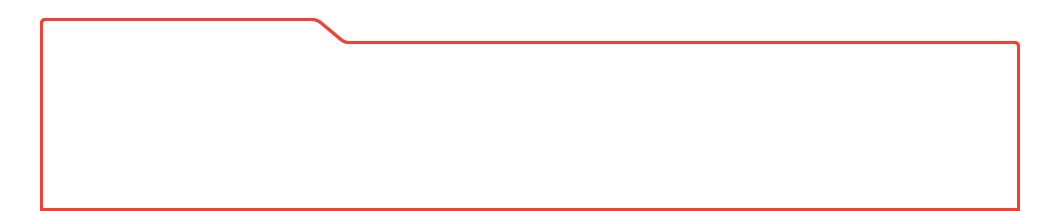
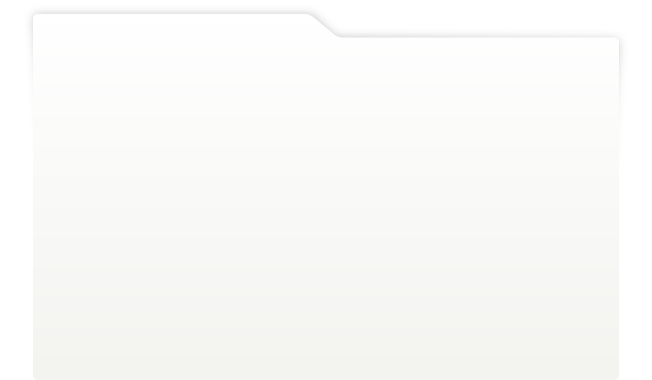
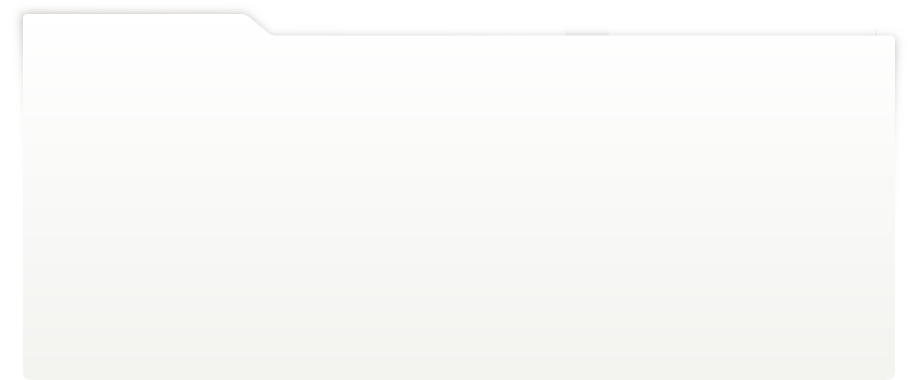
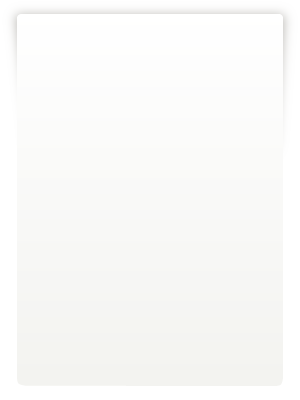
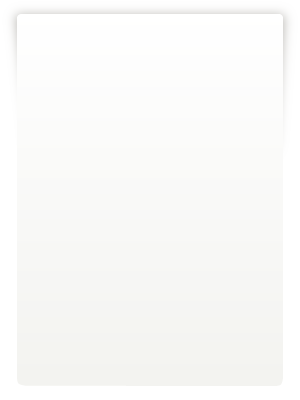
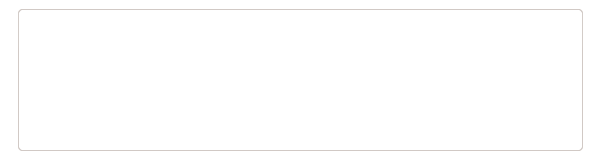
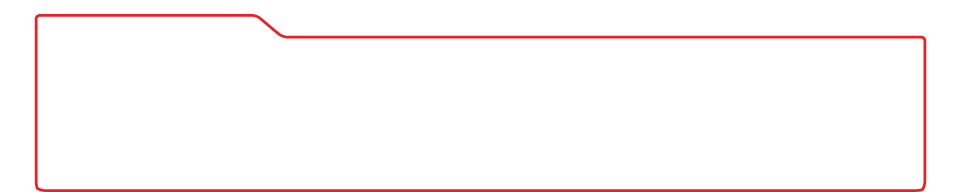
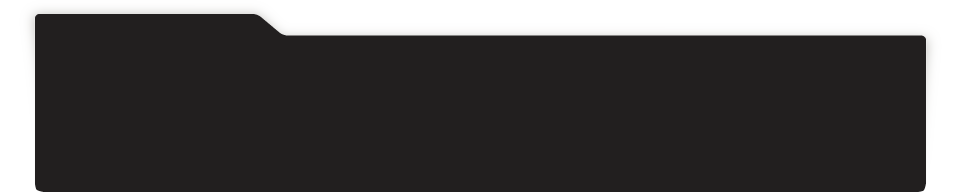
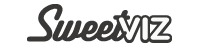
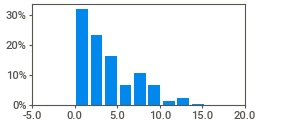
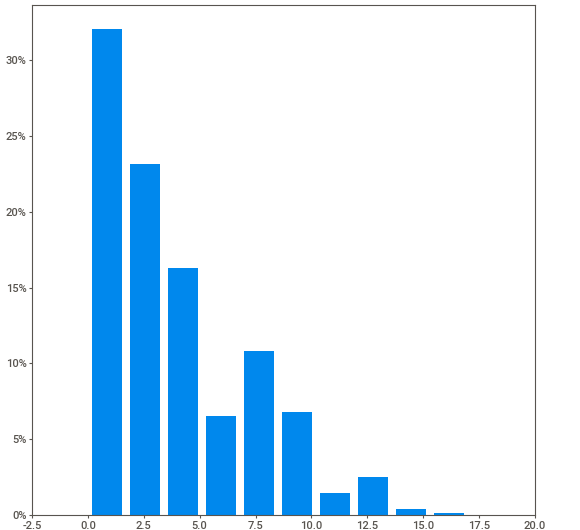
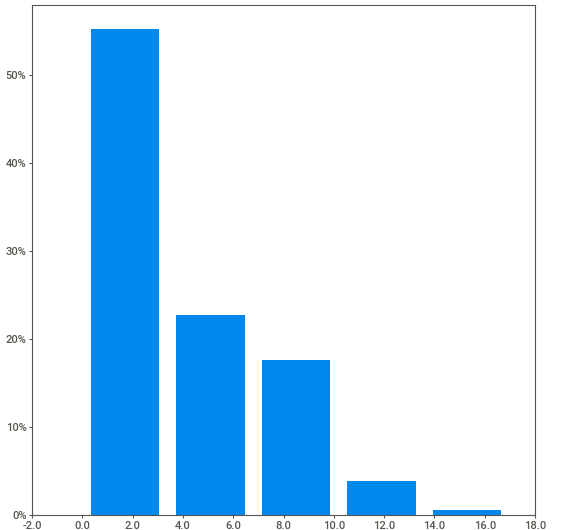
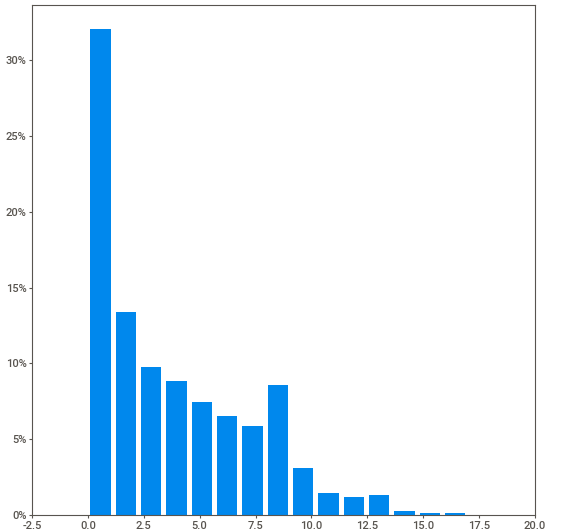
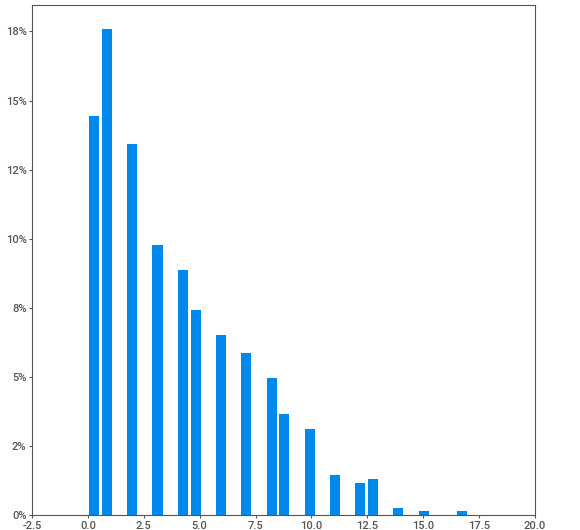
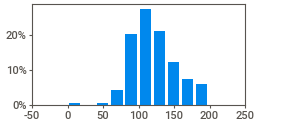
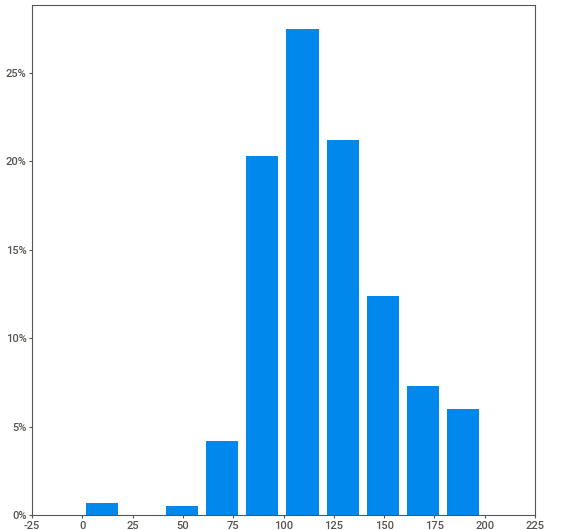
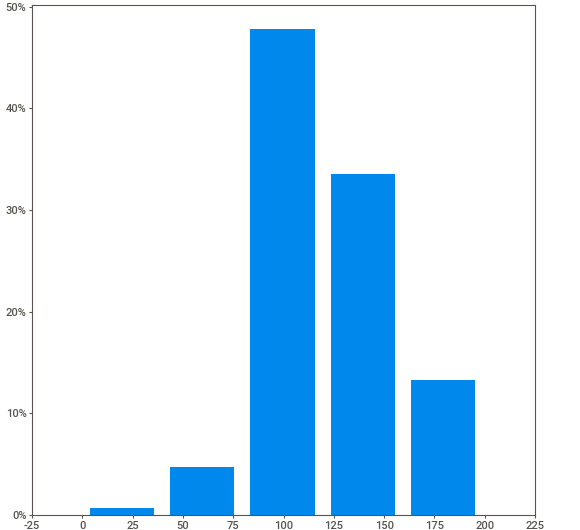
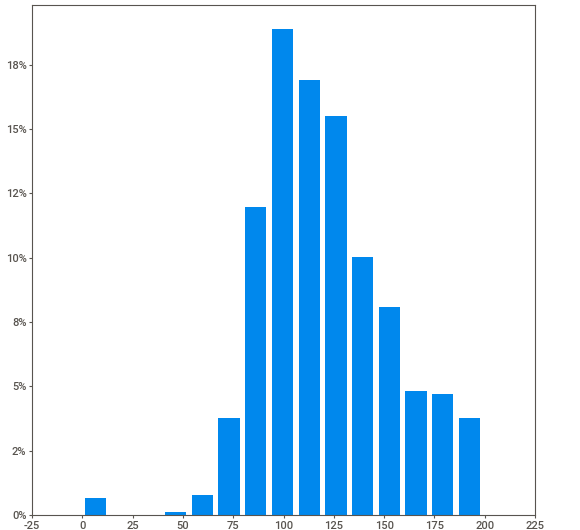
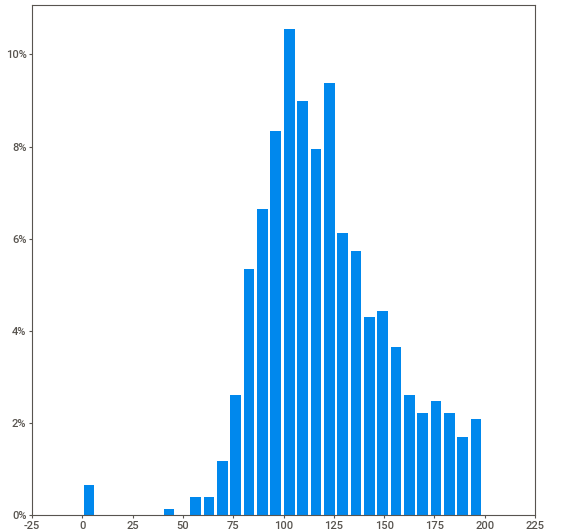
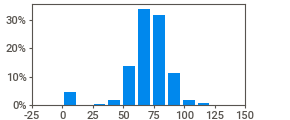
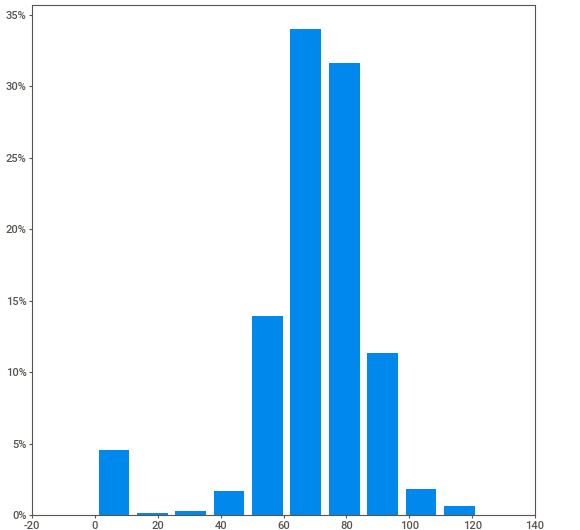
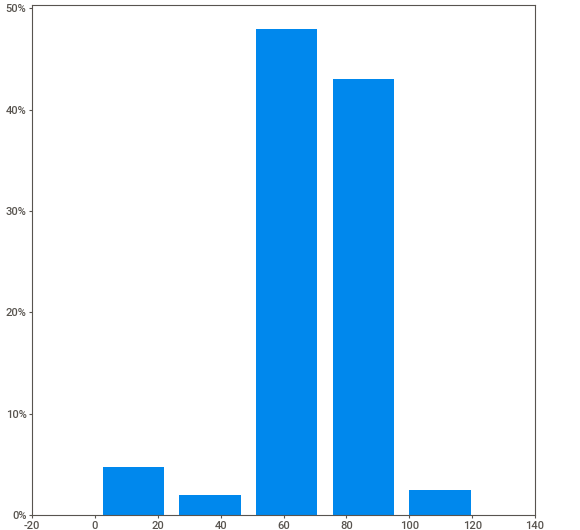
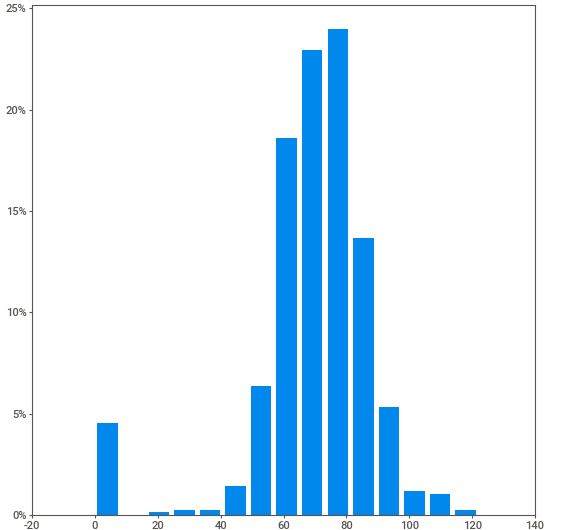
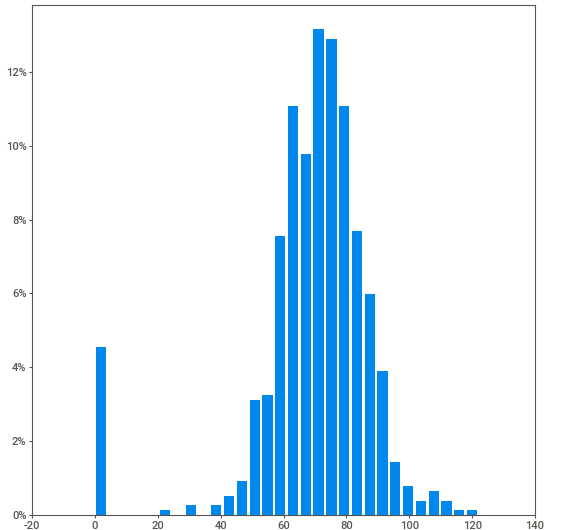
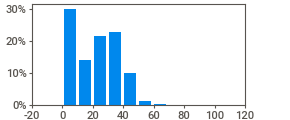
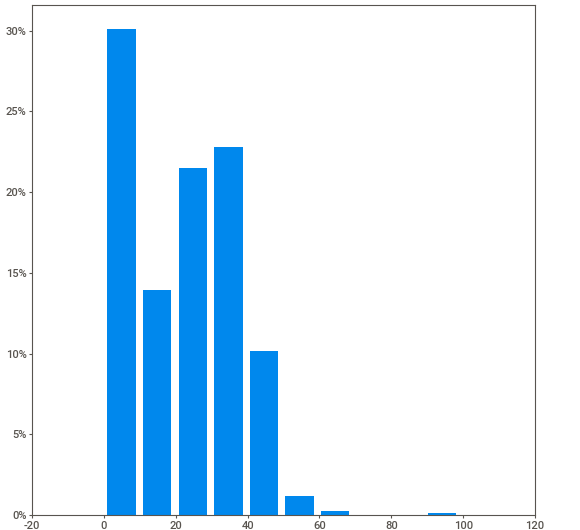
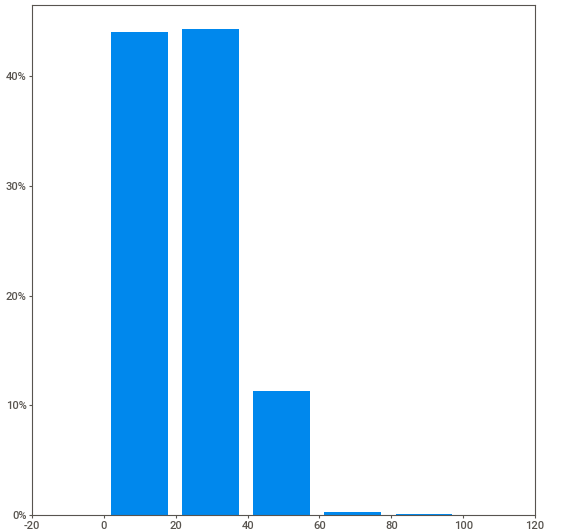
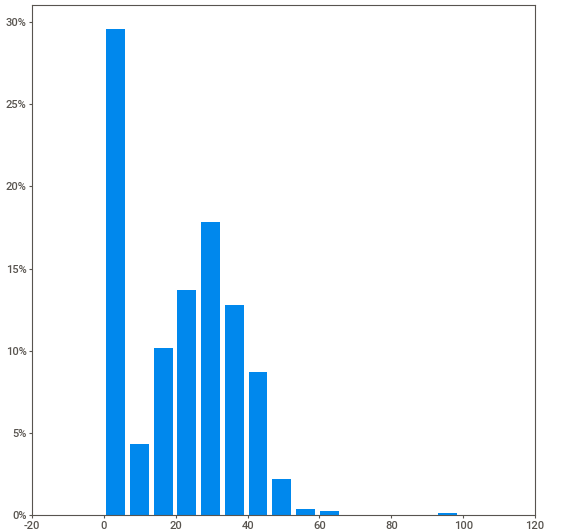
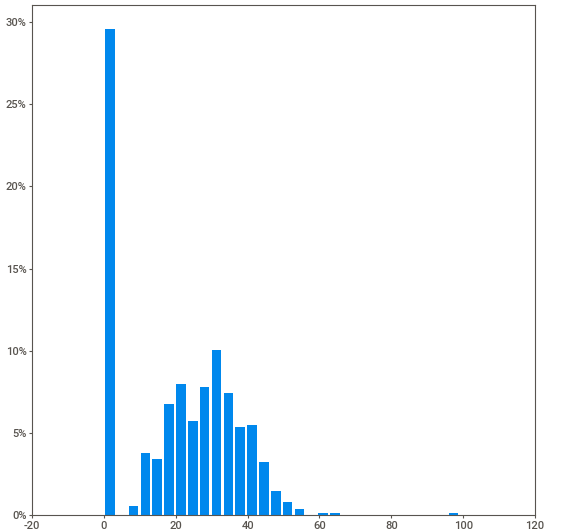
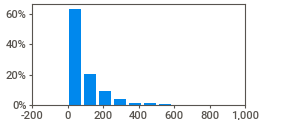
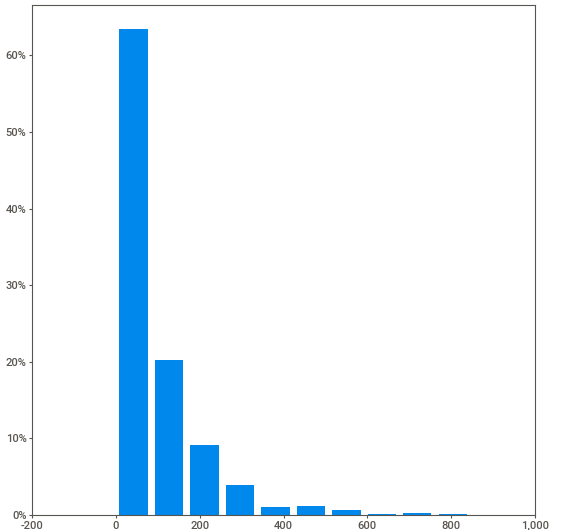
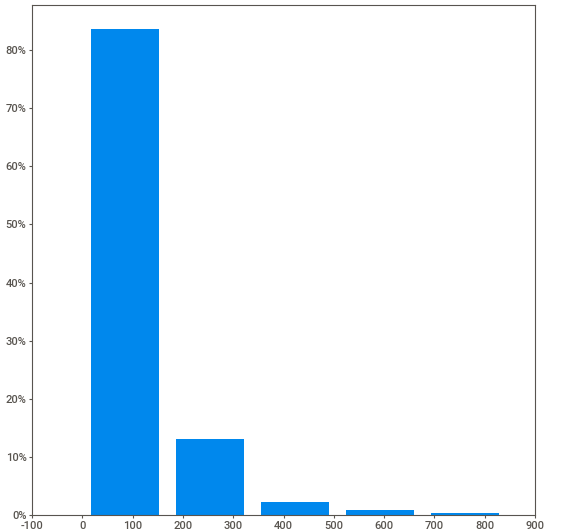
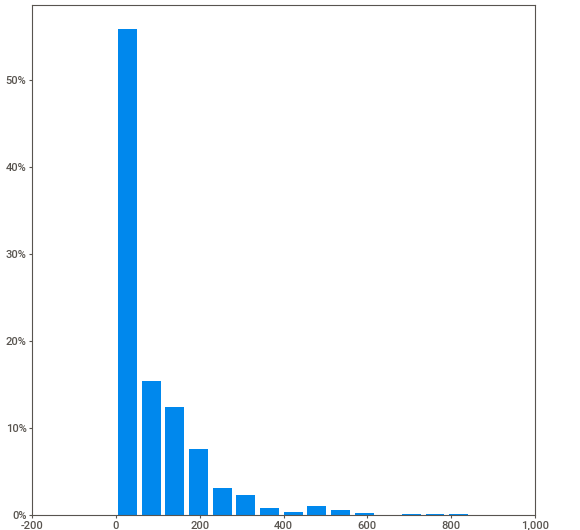
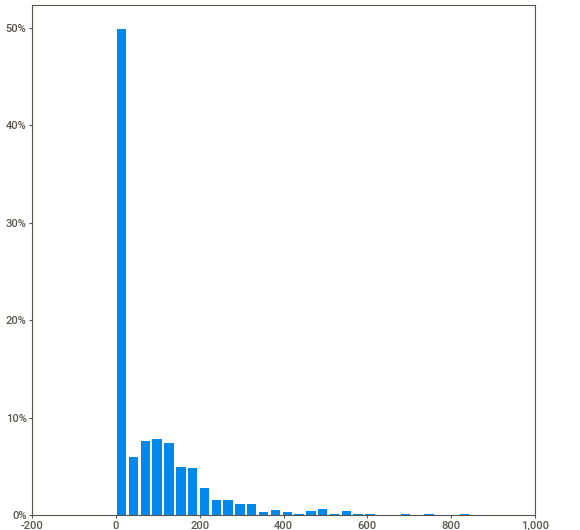
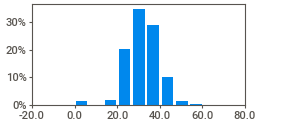
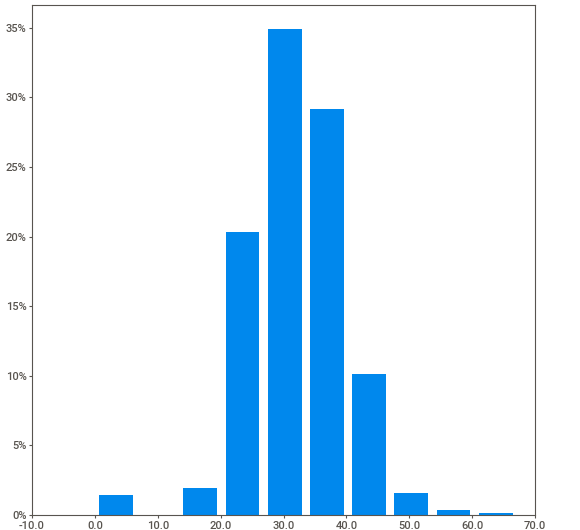
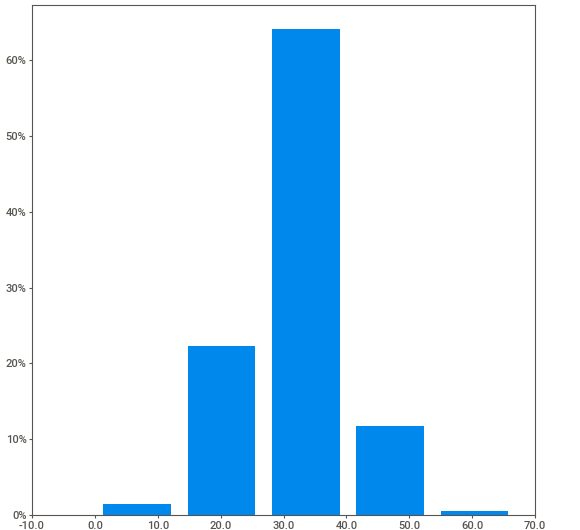
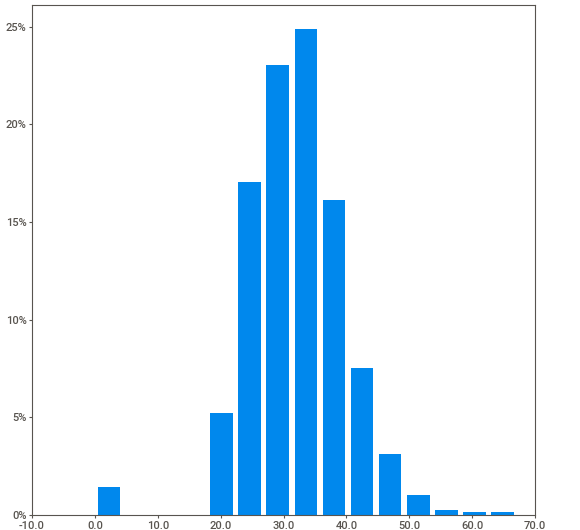
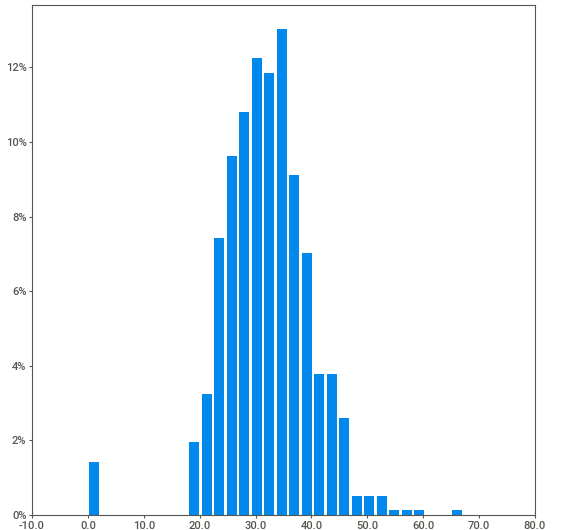
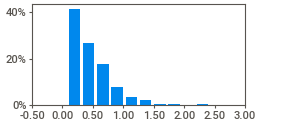
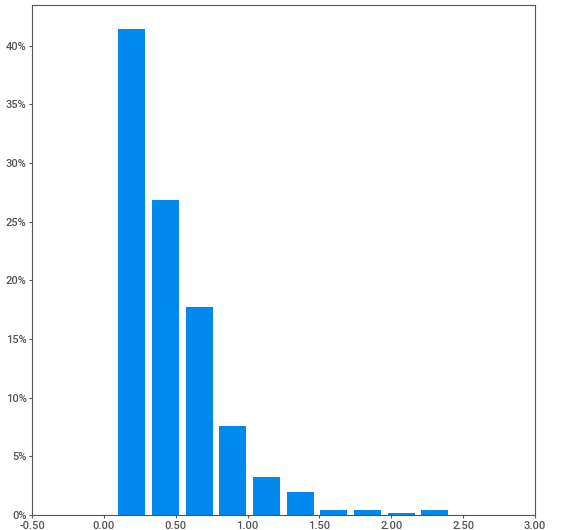
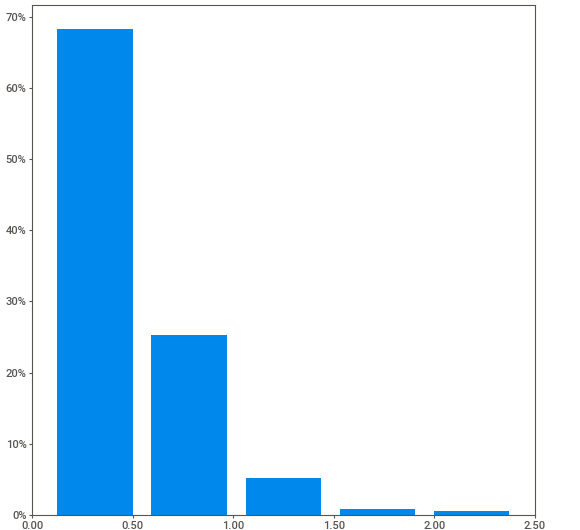
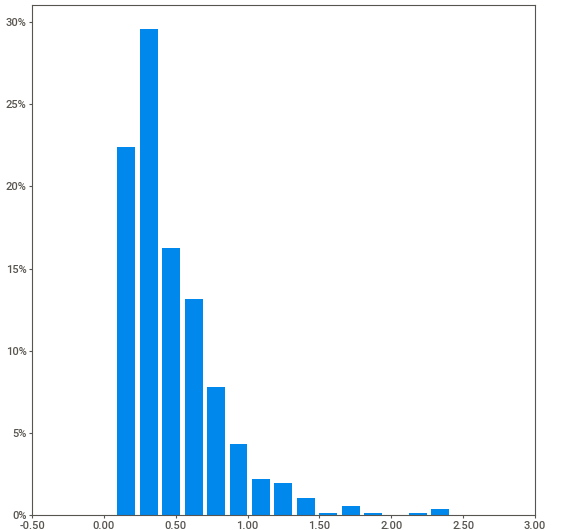
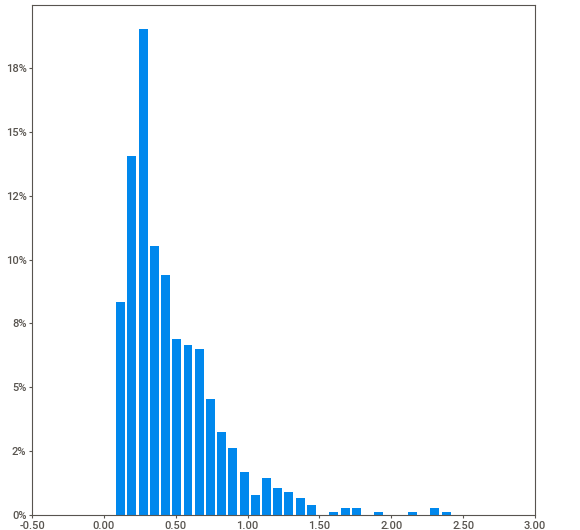
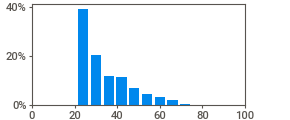
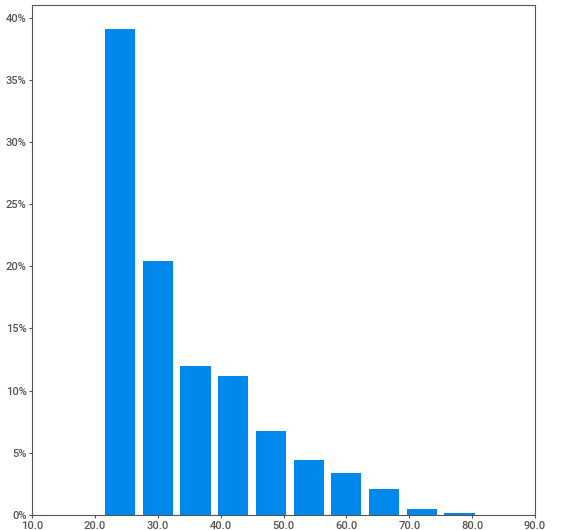
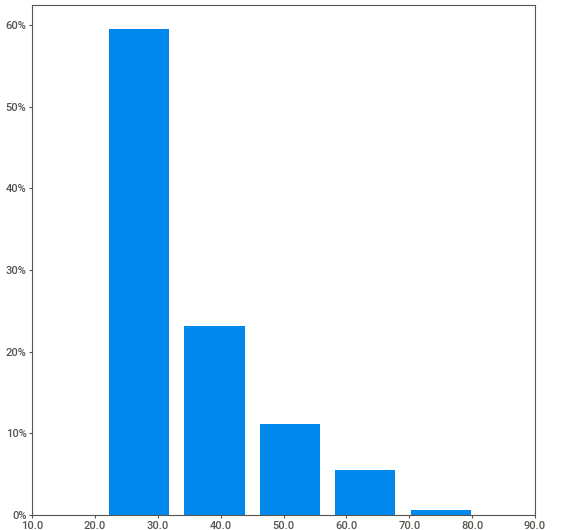
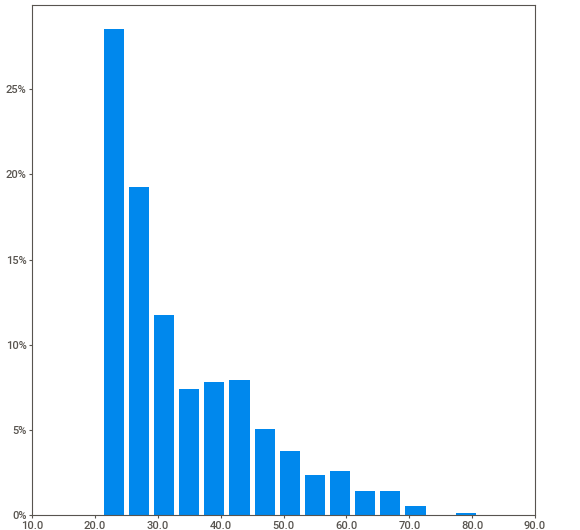
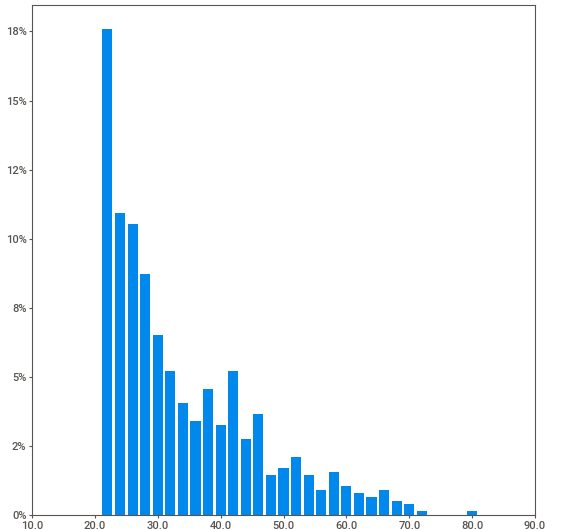
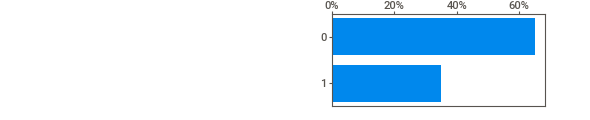
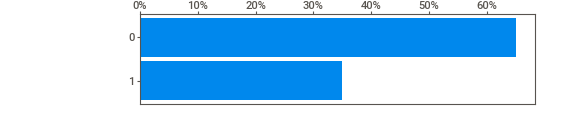
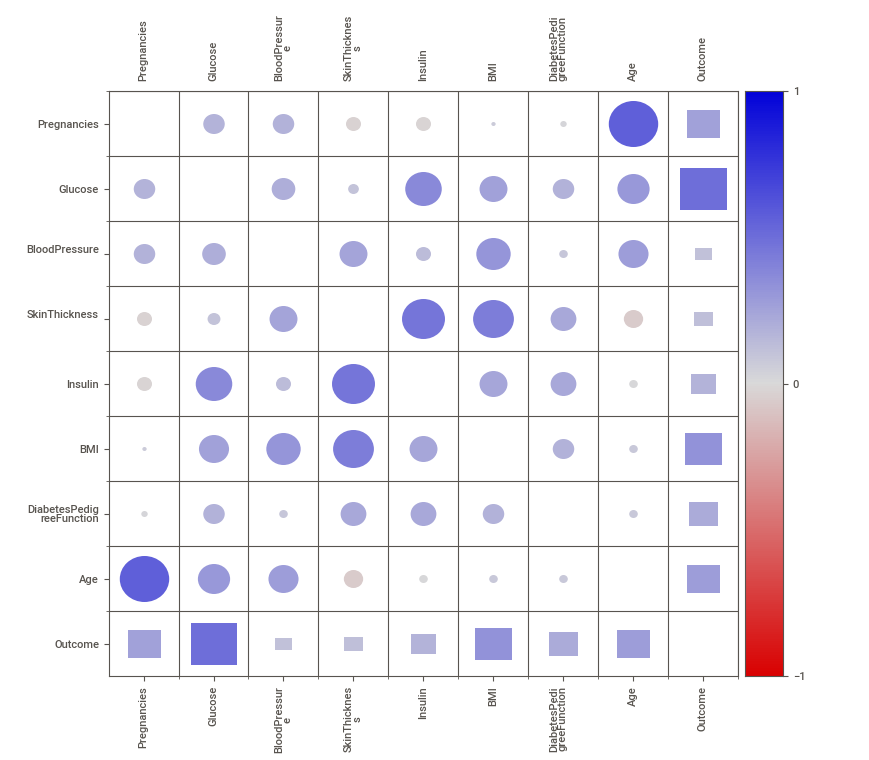
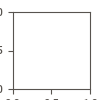

In [5]:
report = sv.analyze(df)
report.show_notebook()

# Modeling 

To apply Explainable AI techniques like SHAP and LIME effectively on the Pima Indians Diabetes dataset, you can experiment with the following models. These cover a range of complexity and interpretability, allowing you to see how explanation methods perform across different types of models:
> Simple and Interpretable Models
1. Logistic Regression
   
   * A classic and interpretable model for binary classification.
   * Great for baseline comparison and easy to explain.
   * Use LIME and SHAP to highlight the significance of features like glucose or BMI.
     
3. Decision Trees
   
   * Highly interpretable.
   * Visualizations can show how decisions are made based on thresholds in features.
   * SHAP values can illustrate feature contributions at each node.

> Moderately Complex Models
1. Random Forest
   
   * An ensemble of decision trees that improves accuracy but reduces interpretability.
   * Use SHAP to explain feature importance across trees or specific predictions.
   * LIME can be used to generate instance-specific explanations.
     
3. Gradient Boosting (e.g., XGBoost)
   
   * Powerful for structured data and handles feature interactions well.
   * SHAP is particularly effective for these models to explain both global and local predictions.
   * LIME can complement SHAP for additional instance-level insights.
  
> Complex Models
1. Support Vector Machines (SVMs)
   
   * Often performs well for small datasets but lacks inherent interpretability.
   * LIME is useful for explaining individual predictions.
   * SHAP can provide a global understanding of feature importance.
     
3. Neural Networks
   
   * Suitable for exploring how Explainable AI works with black-box models.
   * Use SHAP to analyze the contribution of input features to predictions.
   * LIME is also helpful for generating explanations for specific instances.

**Decision Tree**

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [63]:
# The features and label 
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# splitting the data to Training and Testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the Decision tree 
clf = DecisionTreeClassifier(max_depth=4, random_state=42)  
clf.fit(X_train, y_train)

# Prediction 
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


# Interpretability and Explainability of the Models 
* Explaining Decision Trees with SHAP and LIME

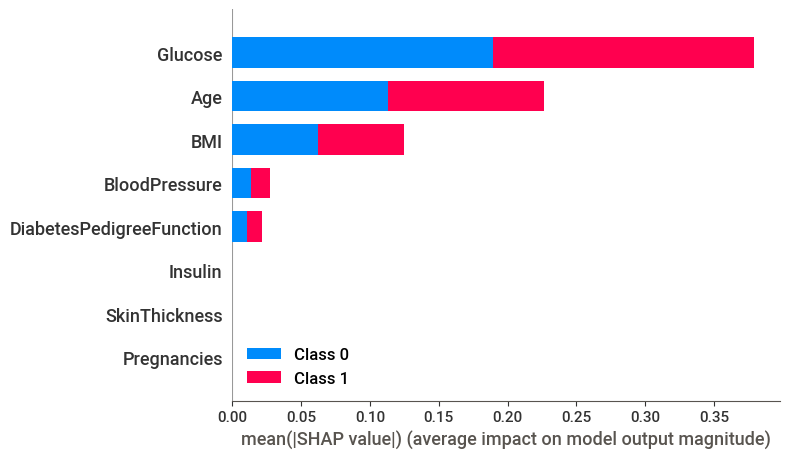

In [64]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)  

In [65]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [66]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
feature_names = list(X_train.columns)
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
explainer = LimeTabularExplainer(X_train_np, mode="classification", training_labels=y_train, feature_names=feature_names)
exp = explainer.explain_instance(X_test_np[0], clf.predict_proba)
exp.show_in_notebook()

In [57]:
import shutil 

output_path= '/kaggle/working'
shutil.rmtree(output_path, ignore_errors=True)

import os 
os.makedirs(output_path, exist_ok=True)

In [67]:
print("Global Feature Importance:")
for feature, importance in zip(feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.3f}")

Global Feature Importance:
Pregnancies: 0.000
Glucose: 0.593
BloodPressure: 0.037
SkinThickness: 0.000
Insulin: 0.000
BMI: 0.173
DiabetesPedigreeFunction: 0.016
Age: 0.180


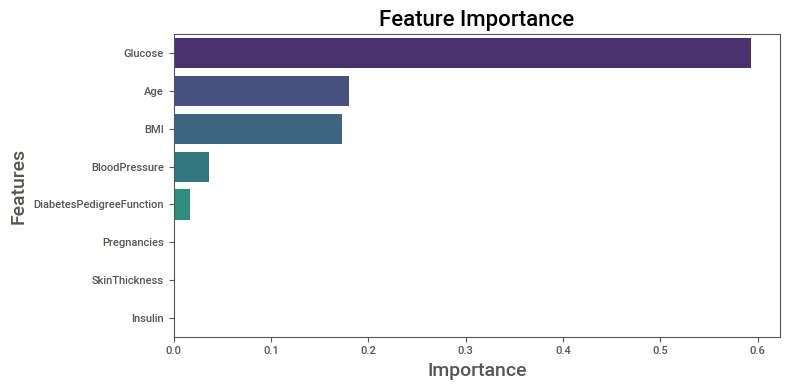

In [76]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    palette='viridis'  # Change palette for different colors
)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

In [79]:
class_names = [str(cls) for cls in df['Outcome'].unique()]
output_path = "/kaggle/working/feature_importance_plot.png"
plt.savefig(output_path)
plt.close()

Decision Tree Confusion Matrix:


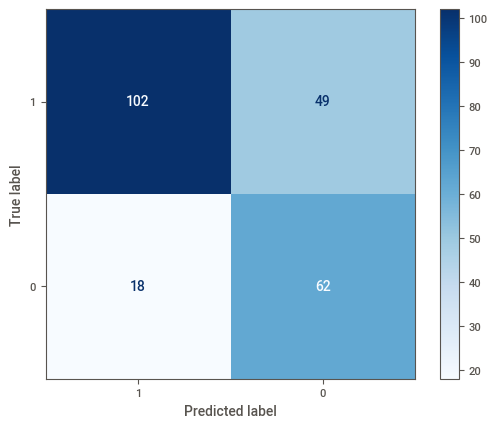

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print("Decision Tree Confusion Matrix:")
dt_cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(dt_cm, display_labels=class_names).plot(cmap="Blues")

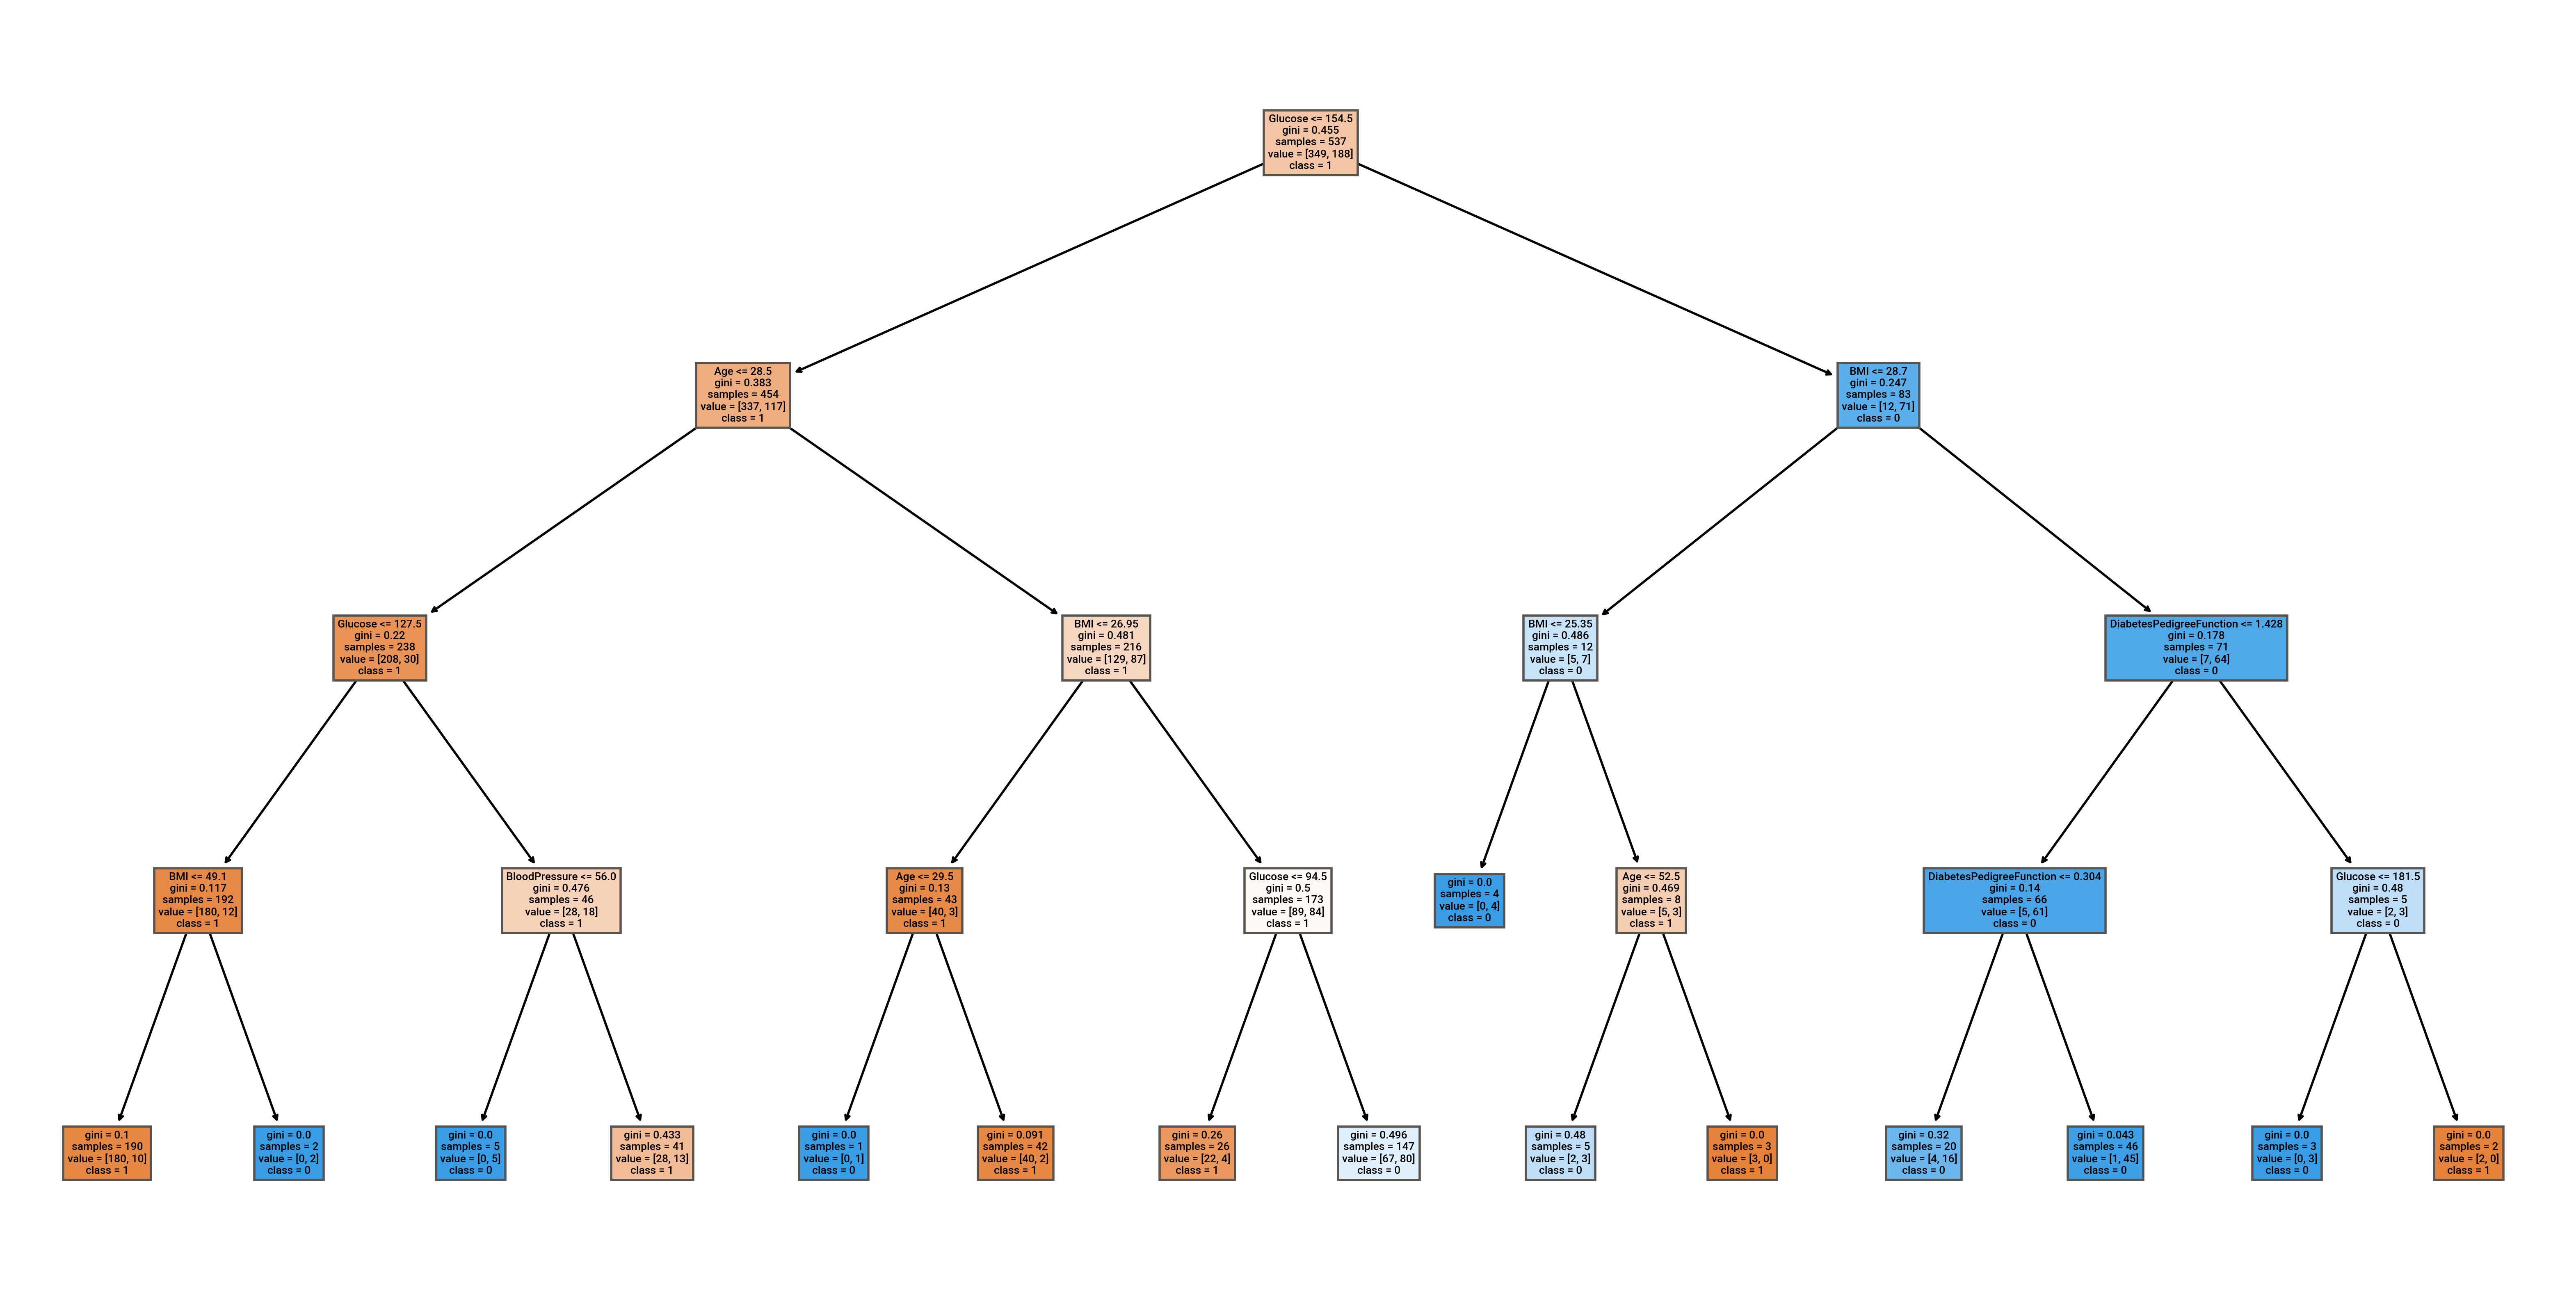

In [44]:
plt.figure(figsize=(20, 10), dpi=400)
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.savefig("decision_tree_high_res.png", bbox_inches='tight', dpi=300)
plt.show()

In [12]:
plt.savefig("decision_tree_high_res.png", bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


In [33]:
explainer = shap.TreeExplainer(rf_model)


Generating SHAP summary plot...


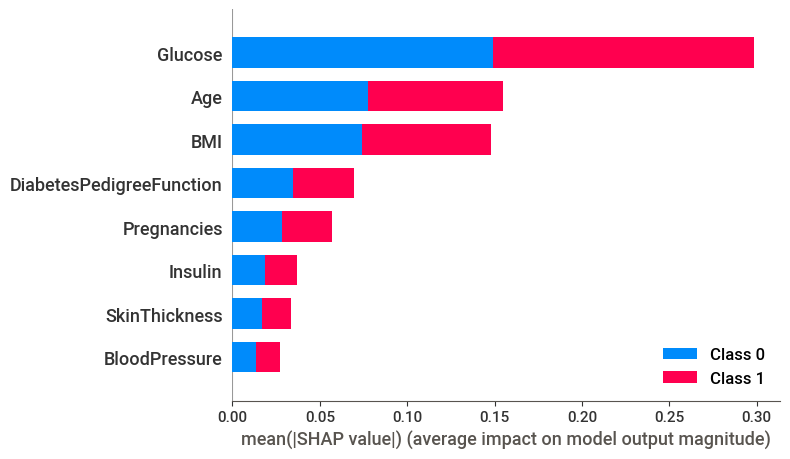


Generating SHAP dependence plot for a feature...


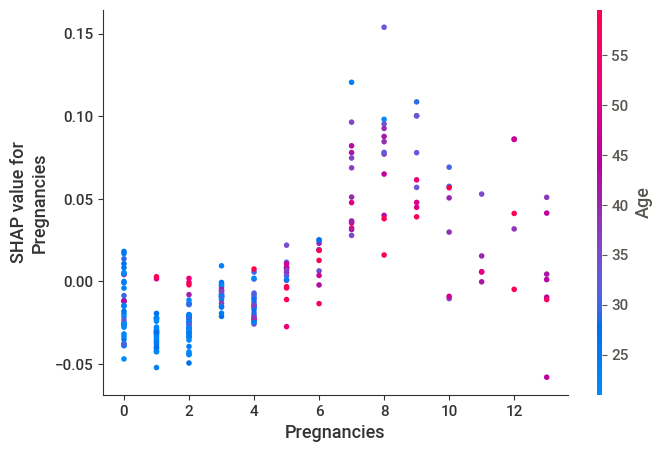

In [34]:
shap_values = explainer.shap_values(X_test)

# Plot summary plot for global interpretation
print("\nGenerating SHAP summary plot...")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Plot SHAP dependence for a specific feature
print("\nGenerating SHAP dependence plot for a feature...")
shap.dependence_plot(0, shap_values[1], X_test, feature_names=X.columns)

In [35]:
explainer = LimeTabularExplainer(
    X_train_np, 
    mode="classification", 
    training_labels=y_train.values,  # Pass the target labels of the training set
    feature_names=feature_names, 
    class_names=class_names,  # Use target names (e.g., species in Iris dataset)
    discretize_continuous=True  # Discretize continuous features for better interpretability
)

# Choose an instance to explain
instance_idx = 0
instance = X_test_np[instance_idx]

# Generate explanation for the chosen instance
exp = explainer.explain_instance(
    instance, 
    rf_model.predict_proba,  # Probability predictions of the classifier
    num_features=5  # Number of top features to include in the explanation
)

# Display explanation in notebook
exp.show_in_notebook()

# Save explanation to HTML
exp.save_to_file('lime_explanation_instance.html')
print("LIME explanation saved to 'lime_explanation_instance.html'.")

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


LIME explanation saved to 'lime_explanation_instance.html'.


Random Forest Confusion Matrix:


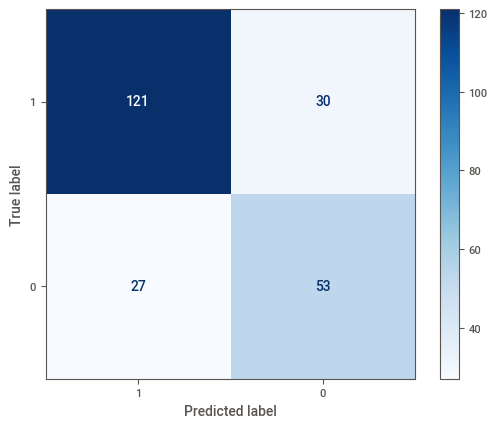

In [36]:
print("Random Forest Confusion Matrix:")
dt_cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(dt_cm, display_labels=class_names).plot(cmap="Blues")